In [1]:
# Los registros presentados son ficticios; este análisis se realiza con fines académicos.

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [203]:
df = pd.read_csv("clima_2025.csv")

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha             200 non-null    object 
 1   temperatura       200 non-null    float64
 2   humedad           200 non-null    int64  
 3   velocidad_viento  200 non-null    int64  
 4   lluvia            200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [232]:
df.isnull().sum() # No hay valores nulos

fecha               0
temperatura         0
humedad             0
velocidad_viento    0
lluvia              0
mes                 0
dtype: int64

In [234]:
df['fecha'] = pd.to_datetime(df['fecha']) # Convertimos la columna fecha a Datetime.

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             200 non-null    datetime64[ns]
 1   temperatura       200 non-null    float64       
 2   humedad           200 non-null    int64         
 3   velocidad_viento  200 non-null    int64         
 4   lluvia            200 non-null    int64         
 5   mes               200 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3)
memory usage: 8.7 KB


In [240]:
# Observamos la representatividad de clima por meses:
df['mes'] = pd.to_datetime(df['fecha']).dt.month
conteo_por_mes = df['mes'].value_counts().sort_index()
print(conteo_por_mes)

mes
1    28
2    21
3    23
4    16
5    26
6    22
7    21
8    24
9    19
Name: count, dtype: int64


<p>Al analizar la cantidad de datos por mes, se observa que la mayoría de los meses tienen un número de observaciones relativamente similar, oscilando entre 16 y 28 datos. Por lo tanto, la muestra está más o menos equilibrada temporalmente para los meses disponibles (enero a septiembre)</p>

In [214]:
df.dtypes

fecha               datetime64[ns]
temperatura                float64
humedad                      int64
velocidad_viento             int64
lluvia                       int64
mes                          int32
dtype: object

In [216]:
df.shape

(200, 6)

In [218]:
df.describe()

,fecha,temperatura,humedad,velocidad_viento,lluvia,mes
count,200,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2025-05-12 11:28:47.205000192,21.119000,67.015000,29.915000,1.760000,4.875000
min,2025-01-01 12:06:25,4.500000,30.000000,0.000000,0.000000,1.000000
25%,2025-03-01 19:11:12.249999872,16.975000,46.000000,15.000000,0.000000,3.000000
50%,2025-05-13 11:41:04,21.050000,66.000000,29.000000,0.000000,5.000000
75%,2025-07-25 12:20:03.750000128,25.725000,86.000000,46.000000,1.000000,7.000000
max,2025-09-16 22:53:47,39.100000,120.000000,60.000000,30.000000,9.000000
std,NaN,6.357375,23.275168,17.960811,4.267724,2.621783


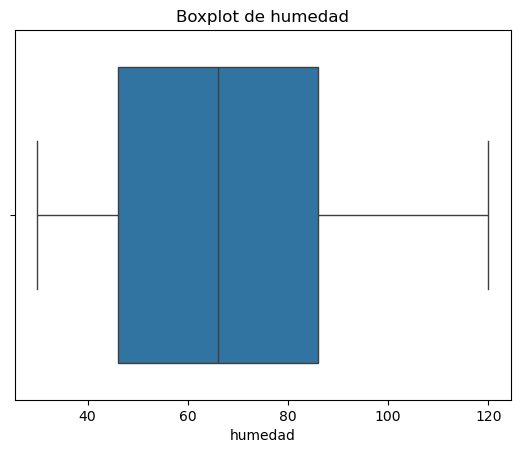

In [220]:
# Analizamos la columna humedad:

sns.boxplot(x=df['humedad'])
plt.title('Boxplot de humedad')
plt.show()

In [222]:
# Observamos la cantidad de humedad que hay fuera de rango:
(df['humedad'] > 100).sum() 

15

In [224]:
# Mostrar filas donde humedad > 100
valores_fuera_rango = df[df['humedad'] > 100]
print(valores_fuera_rango)

                  fecha  temperatura  humedad  velocidad_viento  lluvia  mes
27  2025-06-03 05:08:43         13.7      120                 7       0    6
47  2025-08-14 23:01:39         20.3      105                27       0    8
48  2025-05-12 20:32:46         25.4      103                41       0    5
57  2025-01-22 15:42:08         27.9      103                25       0    1
82  2025-09-13 03:26:36         22.4      117                48       1    9
93  2025-01-01 13:36:24         26.7      118                22       0    1
103 2025-05-02 12:35:46         15.2      103                 6       0    5
116 2025-08-26 13:16:45         12.9      113                50       1    8
130 2025-05-29 02:42:12         28.4      107                24       2    5
135 2025-04-09 12:10:17         18.8      107                 3       0    4
170 2025-02-20 00:37:32         30.0      114                 5       0    2
176 2025-06-16 10:55:04         15.6      110                10       1    6

In [226]:
# Reemplazamos los valores donde la humedad es > 100 con 100 , ya que una humedad > 100 , es incorrecto:
df.loc[df['humedad'] > 100, 'humedad'] = 100

In [228]:
(df['humedad'] > 100).sum()  # Vemos que ya no hay humedad fuera de rango.

0

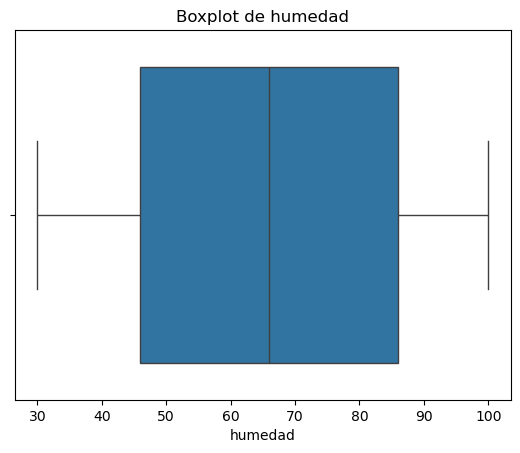

In [230]:
sns.boxplot(x=df['humedad'])
plt.title('Boxplot de humedad')
plt.show()

In [ ]:
# Columna "Fecha"

In [131]:
# Observamos desde donde hasta cuando hay registros: 
df['fecha'].min(), df['fecha'].max()

(Timestamp('2025-01-01 12:06:25'), Timestamp('2025-09-16 22:53:47'))

In [133]:
df['fecha'].value_counts().sort_index()

fecha
2025-01-01 12:06:25    1
2025-01-01 13:36:24    1
2025-01-01 16:58:07    1
2025-01-02 04:42:35    1
2025-01-04 03:30:36    1
                      ..
2025-09-14 20:25:25    1
2025-09-15 20:02:16    1
2025-09-16 00:53:45    1
2025-09-16 12:13:55    1
2025-09-16 22:53:47    1
Name: count, Length: 200, dtype: int64

<h4> Temperatura promedio de cada mes: </h4>

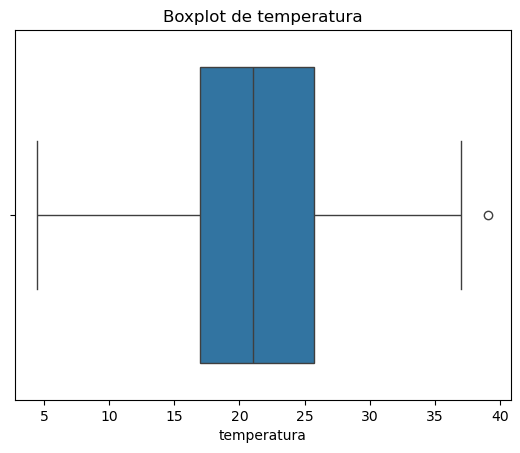

In [177]:
# Supongamos que tu dataframe se llama df y la columna a analizar es 'Columna'
sns.boxplot(x=df['temperatura'])
plt.title('Boxplot de temperatura')
plt.show()

In [179]:
temperatura_promedio = df.groupby('mes')['temperatura'].mean()

In [181]:
print(temperatura_promedio)

mes
1    27.960714
2    27.880952
3    21.647826
4    21.243750
5    22.869231
6    14.709091
7    15.580952
8    16.479167
9    19.826316
Name: temperatura, dtype: float64


<h4>Temperatura máxima de cada mes: </h4>

In [184]:
temp_max = df.groupby('mes')['temperatura'].max()
print(temp_max)

mes
1    39.1
2    33.6
3    26.7
4    29.9
5    29.7
6    23.9
7    24.8
8    24.0
9    32.2
Name: temperatura, dtype: float64


<h4>Temperatura mínima de cada mes: </h4>

In [187]:
temp_min = df.groupby('mes')['temperatura'].min()
print(temp_min)

mes
1    18.7
2    20.2
3    14.5
4    14.0
5    14.2
6     4.5
7     8.5
8     5.3
9    12.3
Name: temperatura, dtype: float64


<h4>Lluvia por cada mes: </h4>

In [193]:
dia_mas_lluvioso = df.loc[df.groupby('mes')['lluvia'].idxmax()]
print(dia_mas_lluvioso)

                  fecha  temperatura  humedad  velocidad_viento  lluvia  mes
166 2025-01-29 18:06:53         28.9       61                32      10    1
104 2025-02-25 07:54:10         30.6       32                 2       2    2
24  2025-03-08 11:17:46         25.6       82                10      15    3
118 2025-04-03 10:53:24         14.0       70                24       5    4
129 2025-05-28 18:22:56         20.1       98                43      15    5
115 2025-06-30 11:39:34         12.7       89                34      20    6
162 2025-07-20 10:59:11         20.9       74                44      30    7
39  2025-08-22 17:24:40         15.6       46                49      20    8
36  2025-09-15 20:02:16         15.9       47                26      10    9


In [195]:
print(dia_mas_lluvioso[['mes','fecha','lluvia']])

     mes               fecha  lluvia
166    1 2025-01-29 18:06:53      10
104    2 2025-02-25 07:54:10       2
24     3 2025-03-08 11:17:46      15
118    4 2025-04-03 10:53:24       5
129    5 2025-05-28 18:22:56      15
115    6 2025-06-30 11:39:34      20
162    7 2025-07-20 10:59:11      30
39     8 2025-08-22 17:24:40      20
36     9 2025-09-15 20:02:16      10


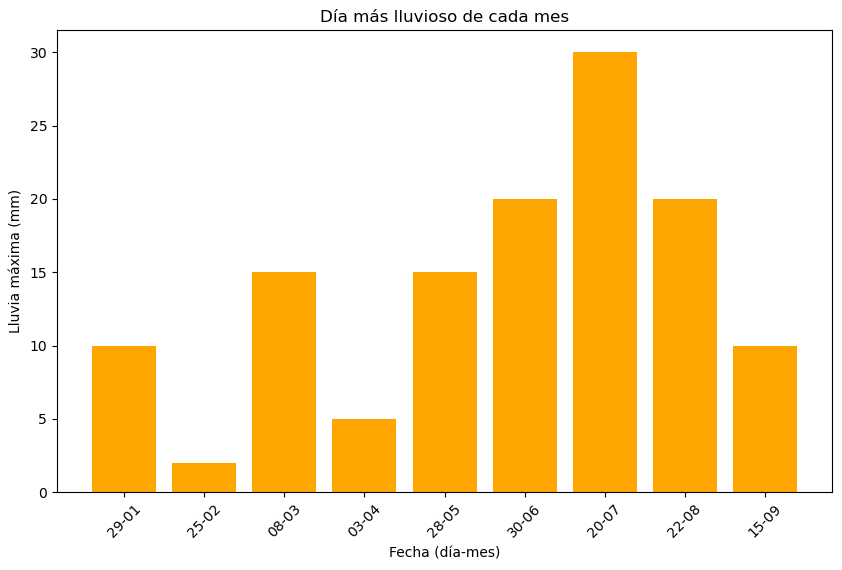

In [197]:
plt.figure(figsize=(10,6))
plt.bar(dia_mas_lluvioso['mes'], dia_mas_lluvioso['lluvia'], color='orange')

# Etiquetas con fecha
plt.xticks(dia_mas_lluvioso['mes'], dia_mas_lluvioso['fecha'].dt.strftime('%d-%m'), rotation=45)
plt.xlabel('Fecha (día-mes)')
plt.ylabel('Lluvia máxima (mm)')
plt.title('Día más lluvioso de cada mes')
plt.show()

<h3>Podemos observar que el mes más lluvioso según los registros fue el mes de JULIO , mientras que el mes que menos llovió fue en el mes de FEBRERO.</h3>

<h4>Humedad promedio mensual </h4>

In [154]:
temperatura_promedio = df.groupby('mes')['humedad'].mean()
print(temperatura_promedio)

mes
1    61.857143
2    60.523810
3    67.521739
4    69.062500
5    69.538462
6    75.500000
7    69.000000
8    60.750000
9    63.894737
Name: humedad, dtype: float64


In [156]:
# Cuantos días llovieron en cada mes:
df_lluvia = df[df['lluvia'] > 0]

# Contar cantidad de días lluviosos por mes
dias_lluviosos_por_mes = df_lluvia.groupby('mes')['fecha'].nunique()
print(dias_lluviosos_por_mes)

mes
1     7
2     3
3     8
4     2
5    11
6    18
7    13
8    14
9     7
Name: fecha, dtype: int64


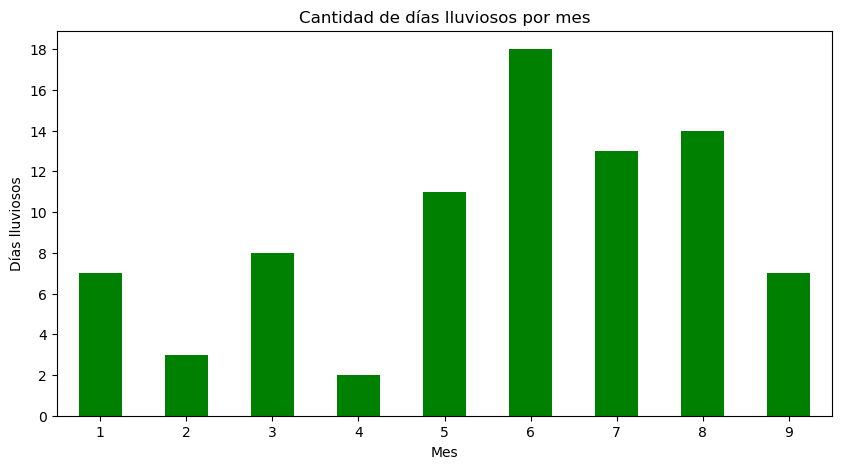

In [158]:
plt.figure(figsize=(10,5))
ax = dias_lluviosos_por_mes.plot(kind='bar', color='green')
plt.title("Cantidad de días lluviosos por mes")
plt.xlabel("Mes")
plt.ylabel("Días lluviosos")
plt.xticks(rotation=0)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

<h3> Podemos observar que en junio se registraron más días con lluvia que en cualquier otro mes; sin embargo, en el gráfico anterior se aprecia que el mes con mayor cantidad de lluvia acumulada en milímetros fue julio (mes 7).</h3>

In [161]:
# Vemos si el dia mas caluroso llovió o tuvo mucha humedad:
# Encontrar el día con la temperatura máxima
dia_mas_caluroso = df.loc[df['temperatura'].idxmax()]
print(dia_mas_caluroso)

fecha               2025-01-07 12:51:25
temperatura                        39.1
humedad                              32
velocidad_viento                     60
lluvia                                0
mes                                   1
Name: 76, dtype: object


<b> Él día más caluroso fue en el mes de enero (1) , tuvo una humedad del 32 % (baja) y no hubo lluvia. </b>

In [164]:
# Buscamos el dia mas frío del año:
dia_mas_frio = df.loc[df['temperatura'].idxmin()]
print(dia_mas_frio)

fecha               2025-06-20 15:35:08
temperatura                         4.5
humedad                              34
velocidad_viento                     40
lluvia                                1
mes                                   6
Name: 153, dtype: object


<b> Él día más frío fue en el mes de Junio (6) , tuvo una humedad del 34 % (baja) y hubo lluvia. </b>

In [167]:
# Lluvia acumulada desde el mes de enero hasta el 18 de septiembre:

In [169]:
lluvia_acumulada = df['lluvia'].sum()

In [41]:
print(lluvia_acumulada)

352


<h4>Definimos una matriz de correlación para observar como se relacionan las variables: </h4>

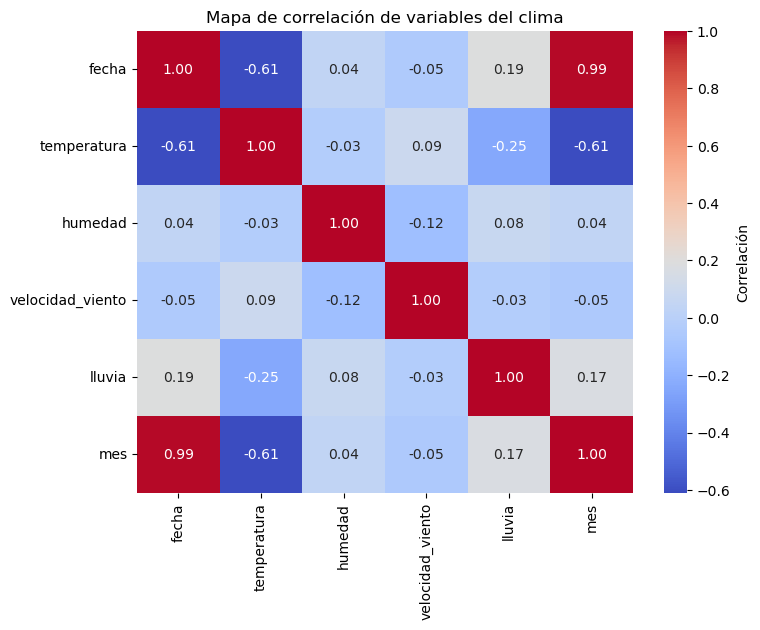

In [43]:
corr = df.corr()

# Graficar mapa de calor de correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlación'})
plt.title("Mapa de correlación de variables del clima")
plt.show()

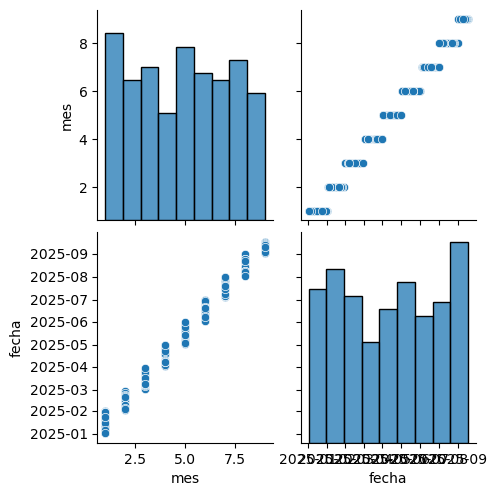

In [175]:
sns.pairplot(data=df, vars= ["mes", "fecha"])
plt.show()